In [1]:
#character level languague models
#first we will try the bigram (one character simply predicts the next one)

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [35]:
len(words)

32033

In [36]:
#min and max length of name in our file
print(min([len(w) for w in words]), max([len(w) for w in words]))

2 15


In [37]:
#bigram languague model. we are only looking at one char, and predict the next. it's a simple and weak model.
#let's create bigram. zip gives us two iterators that go pairwise on two sequences, but exits when one sequence completes.
# so for emma and mma , zip terminates at last 'a' in mma. Taking an example of one word:
for w in words[:1]:
    for ch1,ch2 in zip(w, w[1:]):
        print(ch1,ch2)

e m
m m
m a


In [38]:
for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # breaks the word into list of characters. "." donates either the start or end position
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)

. e
e m
m m
m a
a .


In [39]:
#same code above , for more words
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1,ch2)

. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .
. a
a v
v a
a .


In [40]:
# we will count the occurences of the bigrams. so let's create a dict b that will keep the count. let's then see what b
# looks like considering 3 words only
b = {}
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram , 0) + 1

In [41]:
b

{('.', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '.'): 3,
 ('.', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('.', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [42]:
# run the same code but for all words
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram , 0) + 1

In [43]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [44]:
# better to store this count in a 2D array. easier to maintain
import torch

In [45]:
a = torch.zeros((3,5))
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [46]:
a.dtype

torch.float32

In [47]:
a = torch.zeros((3,5), dtype = torch.int32) 
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [48]:
a[2,1] = 1 #array indexing
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]], dtype=torch.int32)

In [49]:
# we have 26 characters + 1 '.' character to denote start and end 
N = torch.zeros((27,27), dtype = torch.int32)

In [50]:
#let's create a lookup table of characters to integers. we will use this to index in our N array of 28 * 28
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [51]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi = { k : v for k ,v in sorted(stoi.items() , key = lambda kv : kv[1]) }
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [52]:
# let's also maintain an index to char dict
itos = {intgr:char for char, intgr in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [53]:
for w in words:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

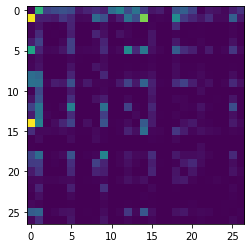

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

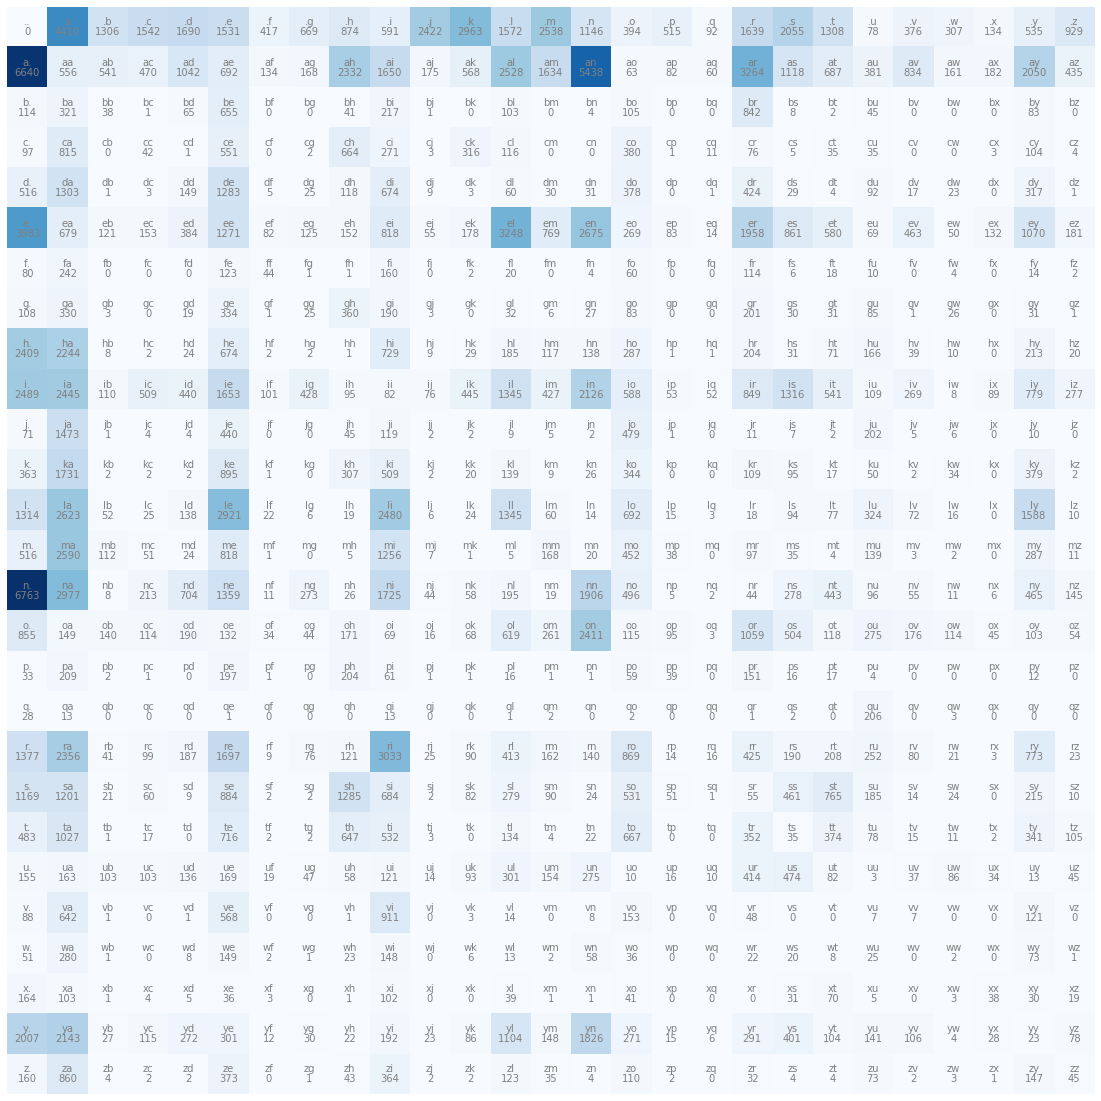

In [56]:
# visualize it better
plt.figure(figsize = (20,20))
plt.imshow(N, cmap = 'Blues')

for i in range(27):
    for j in range(27):
        bigram = itos[i] + itos[j]
        plt.text(j, i, bigram, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off');

In [62]:
N[0] # this tells us count of bigrams '.''a' , '.'b', '.''c' etc...


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [114]:
# convert to probability. now we have the probability of the seeing bigrams or in this case, words that start with either a
# or b or c etc (since the bigram is '.''char')
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [115]:
# now we can sample from this distribution. multinomial probability distribution : you give me probability
# and it will give you integeres according to those prob
# also to make things determinitic , let's set a seed. you do this using generator in pytorch
g = torch.Generator().manual_seed(2147483647)
t = torch.rand(3, generator = g) # gives 3 random numbers
print('random numbers --> ', t)
t = t / t.sum()
print('normalized (or probabilities) --> ', t)
nums = torch.multinomial(t, num_samples = 20, replacement = True, generator = g) 
print('sample according to distribution --> ', nums)

random numbers -->  tensor([0.7081, 0.3542, 0.1054])
normalized (or probabilities) -->  tensor([0.6064, 0.3033, 0.0903])
sample according to distribution -->  tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])


In [129]:
# so now if we ask one number from distrubution p , we get a number : 11 . since we have the map to int to char (itos), 
# we can find out that the char is m. looks right since the count of bigram .m is one of the highest for all .*
g = torch.Generator().manual_seed(2147483647)
drawn = torch.multinomial(p, num_samples = 1, replacement = True, generator = g) 
print(drawn)
drawn = drawn.item() # to get the tensor to spit number 
itos[drawn]

tensor([13])


'm'

In [137]:
# now we can basically start drawing from the start token, and draw till we reach the end. we keep a list of all drawn 
# characters and join them at the end to see the word
out = []
ix = 0 # start token
g = torch.Generator().manual_seed(2147483647)
while True:
    p = N[ix].float()
    p /= p.sum()
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0: # that's now the end token . 0 is for both start and end
        break
''.join(out)

'mor.'

In [143]:
# do it to generate 20 words
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0 # start token
    while True:
        p = N[ix].float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0: # that's now the end token . 0 is for both start and end
            break
    print(''.join(out))

# reason this is generating non sense names is that it's a bad model

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [184]:
# we can make our code a bit efficient. instead of maintaining a count matrix N, and then plucking a row N[ix], and then
# doing p /= p.sum() , we can instead just create a matrix of probs

P = N.float() # copy the count matrix, with float

In [187]:
P.sum(1, keepdims = True) # sum going horizontally

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [188]:
P /= P.sum(1, keepdims = True)

In [193]:
# now we can index from our prob matrix P instead of the count matrix N. we will get the same exact result
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0 # start token
    while True:
        p = P[ix] # get the prob from the P matrix
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0: # that's now the end token . 0 is for both start and end
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [241]:
# let's try to think of the quality of the model. let's use the probs we calculated for our bigrams and see a few examples
for w in words[:3]:
    chs = ['.'] + list(w) + ['.'] # breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        print(f'{ch1}{ch2}: {prob:.4f}')

# if everything was equally likely , the prob would be 1/27
print('If eveything was equally likely , prob of any bigram would be:' , f'{1/27:.4f}')

# we find the prob of the entire dataset assigned by the model. this is called maximum likelihood estimation.
# we take all prob in our P matrix and multiply them for MLE. product of these should be very high for good model

# since the probabilities are close to 0 we take the log , otherwise the product of probabilities will be ~0
# this is called log likelihood
# the log(1) = 0 , lower log(0) = inf . so if prob = 1 (very high chance), log is 0.
# log (a * b * c) = log(a) + log(b) + log(c)

log_likelihood = 0.0
count_of_bigrams = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        count_of_bigrams += 1

print('\nLog likelihood : ', log_likelihood)

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960
If eveything was equally likely , prob of any bigram would be: 0.0370

Log likelihood :  tensor(-38.7856)


In [242]:
# for loss function, we want that the loss should be 0 for a good scenario. however, as a number goes to 0, the log gets
# more and more negative.
# so let's reverse loglikelihood so that we can use it as a loss function. 
negative_log_likelihood = -log_likelihood
print(negative_log_likelihood)

#also people like to avg it up over the data points
negative_log_likelihood /= count_of_bigrams
print(negative_log_likelihood)

tensor(38.7856)
tensor(2.4241)


In [243]:
# the lower the loss function, the better we are .
# lets calculate now over the entire dataset

log_likelihood = 0.0
count_of_bigrams = 0
for w in words:
    chs = ['.'] + list(w) + ['.'] #breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        count_of_bigrams += 1

print('\nLog likelihood : ', log_likelihood)
negative_log_likelihood = -log_likelihood

#also people like to avg it up over the data points
negative_log_likelihood /= count_of_bigrams
print('Negative log likelihood : ' , negative_log_likelihood)


Log likelihood :  tensor(-559891.7500)
Negative log likelihood :  tensor(2.4541)


In [244]:
# now we will approach using Nueral Network (NN)
# NN is still a bigram char level. 
# Our NN will receive a single char as inp and output the prob distr over the next char in the sequence that
# is likely to follow

# create training set of all bigrams (x,y). let's take example of one work. emma
xs , ys = [] , []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']# breaks the word into list of characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [245]:
print(xs) # index of first word '.' is 0 , index of second word e is 5 etc.... this is our input
print(ys) # when word started with '.', then next char was e. so index 5 is our output. 

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [246]:
#however we cant feed index of characters in our NN. instead we will encode integers with one hot encoding. example: to 
#encode 13 , we create a 13 dim tensor with 13th bit as on
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [247]:
W = torch.randn((27,1)) # 27 paramaters for the 27 input of X. 1 denotes 1 neuron 
W

tensor([[ 0.4652],
        [-0.5760],
        [-1.2888],
        [-0.2693],
        [ 0.8245],
        [-1.4114],
        [ 0.7842],
        [ 1.9397],
        [-0.8491],
        [ 1.2299],
        [ 0.1005],
        [-1.2018],
        [ 0.3984],
        [-1.2447],
        [-0.8500],
        [-0.1752],
        [-1.5240],
        [-0.6667],
        [ 0.4017],
        [-0.4079],
        [ 0.4642],
        [-0.5369],
        [ 0.0695],
        [ 0.3949],
        [-1.6043],
        [ 0.2735],
        [-0.4216]])

In [248]:
xenc @ W # (5,27) * (27,1) : we get the 5 activations on these 5 inputs from 1 neuron

tensor([[ 0.4652],
        [-1.4114],
        [-1.2447],
        [-1.2447],
        [-0.5760]])

In [249]:
# let's have 27 neurons instead of one
W = torch.randn((27,27))

# multiply by our encoded input x
xdotw = xenc @ W # activtions on 27 neurons for the  inputs
xdotw

tensor([[-1.0071, -0.9958, -0.2453,  1.1628,  0.6538, -0.4057, -1.0527,  0.1856,
          0.0390, -1.1911,  0.6322,  1.8943,  0.1202, -1.3488, -0.0196,  0.7439,
          1.3589,  0.5380, -1.0998,  0.7391, -0.9706, -1.2624, -0.5152, -0.9372,
          0.2659,  1.2503,  1.1013],
        [-1.0614, -0.1330, -0.0580, -0.4132,  0.4641,  1.7381,  0.9686, -0.4129,
         -0.1989,  0.9549,  0.5981, -0.5798, -0.2391,  0.3872,  0.8694, -0.5918,
          1.2800,  1.0058, -1.0538, -1.2619, -0.5334, -1.3723, -1.4599,  0.6582,
         -0.1005,  0.2025,  0.4868],
        [ 0.0841, -0.4655, -1.8855,  0.9553, -3.2291, -0.0441, -0.1719, -1.2871,
         -0.3213, -1.5793,  0.0502, -1.0384, -1.6108,  0.9619, -0.5228, -0.7133,
         -0.6396, -0.5972,  0.6959,  0.8562,  0.0513, -0.9389, -0.9271, -1.6461,
         -0.2701, -0.0068,  0.0475],
        [ 0.0841, -0.4655, -1.8855,  0.9553, -3.2291, -0.0441, -0.1719, -1.2871,
         -0.3213, -1.5793,  0.0502, -1.0384, -1.6108,  0.9619, -0.5228, -0.7133

In [250]:
# prob dist for the next char in the sequence . how do we interpret the 27 numbers coming from the neurons
# we want them to represent the prob between 0 and 1 
# these 27 numbers are giving us log counts
# to get the count, we take the log counts and exp them.
# exponenets are always positive.
# if you exp a number greater than 0, we get a number greater than 1 . 
# if you exp a number smaller than 0, we get a number between 0 and 1.
(xdotw).exp()
# now these can be interpreted as counts as they can never be below 0. we interpret them as log counts or logits

tensor([[0.3653, 0.3694, 0.7824, 3.1990, 1.9229, 0.6665, 0.3490, 1.2039, 1.0398,
         0.3039, 1.8817, 6.6482, 1.1278, 0.2596, 0.9806, 2.1042, 3.8921, 1.7126,
         0.3329, 2.0941, 0.3789, 0.2830, 0.5974, 0.3917, 1.3046, 3.4915, 3.0080],
        [0.3460, 0.8755, 0.9437, 0.6615, 1.5905, 5.6866, 2.6341, 0.6617, 0.8196,
         2.5984, 1.8187, 0.5600, 0.7874, 1.4729, 2.3856, 0.5533, 3.5967, 2.7341,
         0.3486, 0.2831, 0.5866, 0.2535, 0.2323, 1.9314, 0.9044, 1.2244, 1.6270],
        [1.0877, 0.6278, 0.1518, 2.5994, 0.0396, 0.9568, 0.8420, 0.2761, 0.7252,
         0.2061, 1.0515, 0.3540, 0.1997, 2.6168, 0.5928, 0.4900, 0.5275, 0.5503,
         2.0055, 2.3543, 1.0526, 0.3911, 0.3957, 0.1928, 0.7633, 0.9932, 1.0487],
        [1.0877, 0.6278, 0.1518, 2.5994, 0.0396, 0.9568, 0.8420, 0.2761, 0.7252,
         0.2061, 1.0515, 0.3540, 0.1997, 2.6168, 0.5928, 0.4900, 0.5275, 0.5503,
         2.0055, 2.3543, 1.0526, 0.3911, 0.3957, 0.1928, 0.7633, 0.9932, 1.0487],
        [2.7384, 0.8437,

In [253]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to the N array were we stored counts
probs = counts / counts.sum(1, keepdims = True) # these two steps are the softmax operation :)
probs

tensor([[0.0090, 0.0091, 0.0192, 0.0786, 0.0473, 0.0164, 0.0086, 0.0296, 0.0256,
         0.0075, 0.0462, 0.1634, 0.0277, 0.0064, 0.0241, 0.0517, 0.0957, 0.0421,
         0.0082, 0.0515, 0.0093, 0.0070, 0.0147, 0.0096, 0.0321, 0.0858, 0.0739],
        [0.0091, 0.0230, 0.0248, 0.0174, 0.0417, 0.1492, 0.0691, 0.0174, 0.0215,
         0.0682, 0.0477, 0.0147, 0.0207, 0.0386, 0.0626, 0.0145, 0.0944, 0.0717,
         0.0091, 0.0074, 0.0154, 0.0067, 0.0061, 0.0507, 0.0237, 0.0321, 0.0427],
        [0.0471, 0.0272, 0.0066, 0.1126, 0.0017, 0.0414, 0.0365, 0.0120, 0.0314,
         0.0089, 0.0455, 0.0153, 0.0086, 0.1133, 0.0257, 0.0212, 0.0228, 0.0238,
         0.0868, 0.1020, 0.0456, 0.0169, 0.0171, 0.0083, 0.0331, 0.0430, 0.0454],
        [0.0471, 0.0272, 0.0066, 0.1126, 0.0017, 0.0414, 0.0365, 0.0120, 0.0314,
         0.0089, 0.0455, 0.0153, 0.0086, 0.1133, 0.0257, 0.0212, 0.0228, 0.0238,
         0.0868, 0.1020, 0.0456, 0.0169, 0.0171, 0.0083, 0.0331, 0.0430, 0.0454],
        [0.0927, 0.0286,

In [254]:
probs.shape

torch.Size([5, 27])

In [255]:
probs[0] # input was the one hot encoding for '.' now these are the prob of the next character to expect after '.'

tensor([0.0090, 0.0091, 0.0192, 0.0786, 0.0473, 0.0164, 0.0086, 0.0296, 0.0256,
        0.0075, 0.0462, 0.1634, 0.0277, 0.0064, 0.0241, 0.0517, 0.0957, 0.0421,
        0.0082, 0.0515, 0.0093, 0.0070, 0.0147, 0.0096, 0.0321, 0.0858, 0.0739])

In [260]:
# stepwise , this is what we are doing
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: first char was: {itos[x]} , next char was: {itos[y]} (indexes {x},{y})')
  print('input to the neural net is the index of char:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: first char was: . , next char was: e (indexes 0,5)
input to the neural net is the index of char: 0
output probabilities from the neural net: tensor([0.0090, 0.0091, 0.0192, 0.0786, 0.0473, 0.0164, 0.0086, 0.0296, 0.0256,
        0.0075, 0.0462, 0.1634, 0.0277, 0.0064, 0.0241, 0.0517, 0.0957, 0.0421,
        0.0082, 0.0515, 0.0093, 0.0070, 0.0147, 0.0096, 0.0321, 0.0858, 0.0739])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.016379114240407944
log likelihood: -4.111748218536377
negative log likelihood: 4.111748218536377
--------
bigram example 2: first char was: e , next char was: m (indexes 5,13)
input to the neural net is the index of char: 5
output probabilities from the neural net: tensor([0.0091, 0.0230, 0.0248, 0.0174, 0.0417, 0.1492, 0.0691, 0.0174, 0.0215,
        0.0682, 0.0477, 0.0147, 0.0207, 0.0386, 0.0626, 0.0145, 0.0944, 0.0717,
        0.0091, 0.0074, 0.0154, 0.0067, 0.0061, 0.0507, 0.0237, 0.03

In [261]:
# the goal is to generate a good W (instead of the random generated W), so that the loss is low.
# now we are at optimization stage #
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
print(xs)
print(ys)
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # need to pass requires grad = True so that torch knows we want
# to calculte the grad of this leaf tensor

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [264]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predicted log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
print(probs.shape)
loss = -probs[torch.arange(5), ys].log().mean() # get the probs for the target index, for each input. take the avg neg ll 
print(loss)

torch.Size([5, 27])
tensor(3.7693, grad_fn=<NegBackward0>)


In [265]:
#backward pass
W.grad = None # always set the grad to 0 or nonr first
loss.backward()

In [267]:
W.grad # every element now gives the gradient. 

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [268]:
W.data += -0.1 * W.grad # update W in the negative direction of gradient

In [269]:
# now the loss will be less than before :)
logits = xenc @ W # predicted log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean() # get the probs for the target index, for each input. take the avg neg ll 
print(loss)

tensor(3.7492, grad_fn=<NegBackward0>)


In [270]:
# now we can do it over the entire data set 
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [284]:
# gradient descent, 100 iterations
for k in range(100):
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # regularization added
  print(loss.item())
    
  # backward pass
  W.grad = None # set gradient to zero
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.723001480102539
2.6820788383483887
2.6542158126831055
2.6333680152893066
2.6170542240142822
2.6038625240325928
2.5929291248321533
2.5836946964263916
2.5757765769958496
2.5689024925231934
2.562872886657715
2.557537078857422
2.55277943611145
2.548509120941162
2.544654130935669
2.5411558151245117
2.53796648979187
2.5350475311279297
2.532365322113037
2.529893398284912
2.5276079177856445
2.52548885345459
2.5235190391540527
2.521683931350708
2.5199697017669678
2.5183663368225098
2.5168631076812744
2.5154519081115723
2.5141236782073975
2.5128726959228516
2.511692762374878
2.5105769634246826
2.509521722793579
2.5085225105285645
2.5075743198394775
2.506674289703369
2.5058188438415527
2.505004405975342
2.5042288303375244
2.5034892559051514
2.50278377532959
2.502110004425049
2.5014657974243164
2.5008492469787598
2.5002591609954834
2.4996938705444336
2.4991517066955566
2.498631477355957
2.4981322288513184
2.497652292251587
2.4971909523010254
2.4967474937438965
2.4963202476501465
2.49590945243835

In [290]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
    
        # ----------
        # BEFORE:
        #p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
          break
    print(''.join(out))
# we get the same exact results from NN, as compared to our counting model :) both are doing the same thing, but in case of 
# NN , we were able to get to the result by 

mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
